In [1]:

import numpy as np
import scipy.linalg as linalg
from matplotlib import pyplot
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import math

### 1.2.1
次の関数の2階微分と2階差分はなにか。

#### 解答
$(A-B)\delta(x)$

$U_n = [0,A-B, 0]$


### 1.2.2
$u(-2)=0, u(3)=0$の条件の下$-u''(x)=\delta(x)$を解け。

#### 解答
$-u'(x)=step(x)+A$

$-u(x)=x*step(x)+Ax+B$

ここで初期条件を使って、

$A=-\frac{3}{5}, B=-\frac{6}{5}$



In [3]:
K_4  = linalg.toeplitz([2, -1, 0, 0])
print(K_4)
x = np.linalg.solve(K_4, np.transpose(np.asarray([0,1,0,0])))
print(x)

print([0.6, 1.2, 0.8,  0.4])

[[ 2 -1  0  0]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [ 0  0 -1  2]]
[ 0.6  1.2  0.8  0.4]
[0.6, 1.2, 0.8, 0.4]


### 1.2.3
中心差分$(u(x+h)-u(x-h))/2h$の誤差における$h^2$の項は$\frac{1}{6}h^{2}u'''(x)$である。$u(x)=x^3, u(x)=x^4$についてこれを確認せよ

#### 解答
$u(x)=x^3のとき、u'''(x)=6$だから、誤差における$h^2$の項は$h^2$である。
実際に計算してみると、

In [4]:
n=11
x=np.transpose(np.array([[-3,-2,-1,0,1,2,3,4,5,6,7]]))
a=-np.ones([1,n])
b=np.zeros([1,n])
x3 = x*x*x
x4=x*x*x*x
x3d = 3*x*x
x4d = 4*x*x*x
print(x3)
A = 1/2*sp.spdiags(np.r_[a, b, -a], [-1,0,1],n,n).toarray()
print(A.dot(x3)-x3d)
print(A.dot(x4)-x4d)

[[-27]
 [ -8]
 [ -1]
 [  0]
 [  1]
 [  8]
 [ 27]
 [ 64]
 [125]
 [216]
 [343]]
[[ -31.]
 [   1.]
 [   1.]
 [   1.]
 [   1.]
 [   1.]
 [   1.]
 [   1.]
 [   1.]
 [   1.]
 [-255.]]
[[  116.]
 [   -8.]
 [   -4.]
 [    0.]
 [    4.]
 [    8.]
 [   12.]
 [   16.]
 [   20.]
 [   24.]
 [-2020.]]


### 1.2.4
式(28)の後退差分行列の逆行列が式(29)の和分行列であることを確認せよ。
しかし、中心差分の行列は可逆でないことがある。n=3, n=5について$\Delta_0u=0$を解け。
#### 解答
和分行列であることが確認できた。
一方で、中心差分行列は3次の場合は逆行列が存在したが、5次の場合detが0となり逆行列が存在しなかった。

微分方程式としてはどういう意味？

In [5]:
a=np.ones([1,4])
T_3_b= sp.spdiags(np.r_[-a, a], [-1,0],3,3).toarray()
T_3_f= sp.spdiags(np.r_[-a, a], [1,0],3,3).toarray()
T_4_b= sp.spdiags(np.r_[-a, a], [-1,0],4,4).toarray()
T_4_f= sp.spdiags(np.r_[-a, a], [1,0],4,4).toarray()
T_5_b= sp.spdiags(np.r_[-a, a], [-1,0],5,5).toarray()
T_5_f= sp.spdiags(np.r_[-a, a], [1,0],5,5).toarray()
D_3_cent = (T_3_f + T_3_b)/2
D_5_cent = (T_5_f + T_5_b)/2
print(T_4_b)
print(linalg.inv(T_4_b))
print(T_4_f)
print(D_3_cent)
print(linalg.solve(D_3_cent, np.zeros([3,1])))
print(linalg.solve(D_5_cent, np.zeros([5,1])))


[[ 1.  0.  0.  0.]
 [-1.  1.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  0. -1.  1.]]
[[ 1. -0. -0. -0.]
 [ 1.  1. -0. -0.]
 [ 1.  1.  1. -0.]
 [ 1.  1.  1.  1.]]
[[ 1. -1.  0.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  1. -1.]
 [ 0.  0.  0.  1.]]
[[ 1.  -0.5  0. ]
 [-0.5  1.  -0.5]
 [ 0.  -0.5  1. ]]
[[ 0.]
 [ 0.]
 [ 0.]]


LinAlgError: Matrix is singular.

### 1.2.5
前進差分のテイラー展開において、$u(x)=x^4, x=0$とすることにより、4次の項の係数を求めよ。

#### 解答
$u(x+h) = u(x)+hu'(x)+\frac{1}{2}h^2u''(x)+\frac{1}{6}h^3u'''(x)+...$
4次の項は$\frac{1}{24}h^4u''''(x)$
いま、$u(x)=x^4$だから$u''''(x)=24$で、よって求める係数は$a=1/24$, $au''''(0)=1$


### 1.2.6
$u(x)=x^4$について、２階微分と2階差分を求めよ。比較を行い、誤差の主要項の係数を求めよ。

#### 解答
微分については$12x^2$。テイラー展開の結果、二階差分で$x^4$を演算する場合誤差の項は$h$の2次, 4次, ...の項がある。
$u(x+h) = u(x)+hu'(x)+\frac{1}{2}h^2u''(x)+\frac{1}{6}h^3u'''(x)+\frac{1}{24}h^4u''''(x)...$

$u(x+h)-2u(x)+u(x-h) = h^2u''(x)+2*\frac{1}{24}h^4u''''(x)$
2階微分に対応させるために$\frac{u(x+h)-2u(x)+u(x-h)}{h^2}$とすると、誤差項は$\frac{1}{12}h^2u''''(x)=2h^2$

### 1.2.7
$u$において4点の標本値を使えば、$\frac{du}{dx}$に対する4次精度の中心差分が計算できる。

$\frac{-u_2+8u_1-8u_{-1}+u_{-2}}{12h}$
1. この式が$u=1, u=x^2, u=x^4$について正しいことを確認せよ。


#### 解答
1. u=1については各項の係数から明らかである。他の係数のものも、5項分使わないと理論的に正しくないので端部ではエラーが大きいが中心付近では計算機の計算精度依存のみになっているように見られた。



[[ 0.  8. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-8.  0.  8. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -8.  0.  8. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -8.  0.  8. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -8.  0.  8. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -8.  0.  8. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -8.  0.  8. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -8.  0.  8. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -8.  0.  8. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -8.  0.  8. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -8.  0.  8. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -8.  0.  8. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -8.  0.  8. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -8.  0.  8.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -8.  0.]]
[ -6.66666667e-01  -8.33333333e-02   0.00000000e+00   

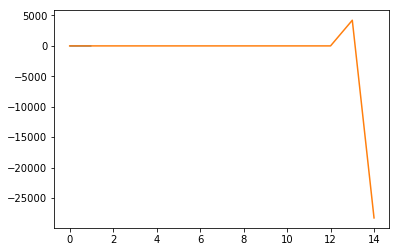

In [71]:
n=15
a=np.ones([1,n])
D_10_4pre= 1/12*sp.spdiags(np.r_[a, -8*a, 8*a, -a], [-2,-1,1,2],n,n).toarray()
print(D_10_4pre*12)
x=np.array(range(n))
x_2 = x*x
x_4 =x*x*x*x
x_2_d = 2*x
x_4_d = 4*x*x*x
print(D_10_4pre.dot(x_4)-x_4_d)
print(D_10_4pre.dot(x_2)-x_2_d)


pyplot.plot(D_10_4pre.dot(x_4)-x_4_d)
pyplot.show()


### 1.2.8
$u_{-2},u_{-1},u_{0},u_{1},u_{2}$を組み合わせて4次精度の中心差分？

#### 解答
$\frac{-u_2+16u_1+30u_0+16u_{-1}-u_{-2}}{12h}$


### 1.2.9
次の式が4次精度の4回差分であることを$x,x^2,x^3,x^4$を用いて確認せよ。

$\frac{-u_2-4u_1+6u_0-4u_{-1}+u_{-2}}{h^4}$

#### 解答

以下の結果より4次の係数は-22

In [ ]:
n=15
a=np.ones([1,n])
D_n_4d_4pre= sp.spdiags(np.r_[a, -4*a, 6*a,  -4*a, a], [-2,-1, 0,1,2],n,n).toarray()
print(D_n_4d_4pre)
x=np.transpose(np.array([range(n)]))
print(x)
x_2 = x*x
x_3=x*x*x
x_4 =x*x*x*x
x_4_d4 = 24
# print(D_n_4d_4pre.dot(x))
# print(D_n_4d_4pre.dot(x_2))
# print(D_n_4d_4pre.dot(x_3))
print(D_n_4d_4pre.dot(x_4))
print(D_n_4d_4pre.dot(x_4)-x_4_d4)

### 1.2.10
前進差分と後退差分の行列をかける順番を変えた時、境界条件はどうなるか？


#### 解答
末尾の行が境界条件となる。u'=0は最初の行。「近似」という表現なのは、離散的な数においてもu=0は厳密に設定できるのに対しu'=0は離散的なデータの差分を使うため誤差が生じるからである。

In [ ]:
T_5_b= sp.spdiags(np.r_[-a, a], [-1,0],5,5).toarray()
T_5_f= sp.spdiags(np.r_[-a, a], [1,0],5,5).toarray()
D_5_cent = (T_5_f.dot(T_5_b))/2
print( (T_5_f.dot(T_5_b))/2)
print( (T_5_b.dot(T_5_f))/2)

### 1.2.11
$\frac{du}{dx}$に対する2次精度の片側差分近似が欲しいとして、
$\frac{ru(x)+su(x-{\Delta}x)+tu(x-2{\Delta}x)}{{\Delta}x}=\frac{du}{dx}$
ただし、$u=1,x,x^2$
$u=1,x,x^2$を代入してr,s,tに関する3本の方程式を解け。対応する差分行列は下三角になる。この公式は因果的である。

#### 解答
答えが既知（＝右辺が既知）の方程式で、かつ係数行列がの各行が独立（$1,x,x^2$）で未知数の数と同じだけ存在する条件を揃えて、行列で未知数を求めるアプローチ。1,x,x^2を使うことで右辺が1階微分の係数にできる。今回はx=0を仮定して式を作成した。

1.5, -2, 0.5


In [ ]:
A=np.array([[1,1,1],[0,-1,-2],[0,1,4]])
print(A)
f=np.transpose(np.array([[0,1,0]]))
print(f)
print(linalg.solve(A,f))

### 1.2.12
$\frac{1}{h}[(\frac{u_{i+1}-u_i}{h})-(\frac{u_{i}-u_{i-1}}{h})]  is  \frac{u_{i+1}-2u_i+u_{i-1}}{h^2}$
上の式は"１階差分の１階差分"である。この左辺と

$\frac{1}{h}[u_{i+\frac{1}{2}}-u_{i-\frac{1}{2}}]$
との差は$O(h^2)$である。なぜか。また、$u_i''$との差も$O(h^2)$である。なぜか。
#### 解答
テイラー展開するとそうなる。
もっと言うと、1次の誤差項は$u_{i+1}とu_{i-1}$との間で打ち消されるため、結果として2次の誤差項が主要項となる。この打ち消しは$i$からのずれが正負で対称なものの差をとる時起こるので、ズレ幅が$\frac{1}{2}$であっても同じことが起こる。ただし、この時2次の項の係数が$\frac{1}{h}[(\frac{u_{i+1}-u_i}{h})-(\frac{u_{i}-u_{i-1}}{h})]$とは異なるため、二つの2階差分の式の差は$O(h^2)$となる。同様にして、$u_i''$との差が$O(h^2)$なのは1次の誤差の主要項が2次であることに依る。




### 1.2.13


#### 解答



In [ ]:
n=3
h=0.25
# A = np.array([1,1,1,1,1,1,1])
# print(A)
# for x in range(n):
#     A[x] =np.sum(range(n))-np.sum(range(x))
# a = h*h*(np.array([range(n)]))
# print(A)
# pyplot.plot(A)
# pyplot.show()


T_7  = linalg.toeplitz([2, -1]+[0]*(n-2))
T_7[0,0]=1
f_7=np.ones([n,1])
print(T_7)
print(f_7)
u=linalg.solve(1/h/h*T_7,f_7)

print(u)
pyplot.plot(u)
pyplot.show()




### 1.2.14


#### 解答
完全解は$x^4-1$


[[-0.9999    ]
 [-0.9999    ]
 [-0.99989988]
 [-0.99989928]
 [-0.9998976 ]
 [-0.999894  ]
 [-0.9998874 ]
 [-0.99987648]
 [-0.99985968]
 [-0.9998352 ]
 [-0.999801  ]
 [-0.9997548 ]
 [-0.99969408]
 [-0.99961608]
 [-0.9995178 ]
 [-0.999396  ]
 [-0.9992472 ]
 [-0.99906768]
 [-0.99885348]
 [-0.9986004 ]
 [-0.998304  ]
 [-0.9979596 ]
 [-0.99756228]
 [-0.99710688]
 [-0.996588  ]
 [-0.996     ]
 [-0.995337  ]
 [-0.99459288]
 [-0.99376128]
 [-0.9928356 ]
 [-0.991809  ]
 [-0.9906744 ]
 [-0.98942448]
 [-0.98805168]
 [-0.9865482 ]
 [-0.984906  ]
 [-0.9831168 ]
 [-0.98117208]
 [-0.97906308]
 [-0.9767808 ]
 [-0.974316  ]
 [-0.9716592 ]
 [-0.96880068]
 [-0.96573048]
 [-0.9624384 ]
 [-0.958914  ]
 [-0.9551466 ]
 [-0.95112528]
 [-0.94683888]
 [-0.942276  ]
 [-0.937425  ]
 [-0.932274  ]
 [-0.92681088]
 [-0.92102328]
 [-0.9148986 ]
 [-0.908424  ]
 [-0.9015864 ]
 [-0.89437248]
 [-0.88676868]
 [-0.8787612 ]
 [-0.870336  ]
 [-0.8614788 ]
 [-0.85217508]
 [-0.84241008]
 [-0.8321688 ]
 [-0.821436  ]
 [-0.81019

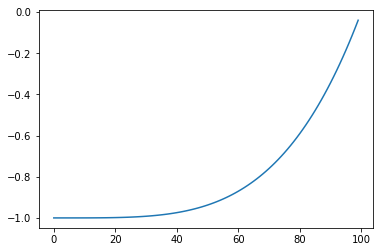

In [6]:

n=100
h=0.01

T_100  = linalg.toeplitz([2, -1]+[0]*(n-2))
T_100[0,0]=1
x = np.transpose(np.array([range(n)]))*h
# print(x)
f_100=-x*x*12
# print(T_1)
# print(f_7)
u=linalg.solve(1/h/h*T_100,f_100)

print(u)
pyplot.plot(u)
pyplot.show()



# print(np.hstack((np.array([1,-1]),np.zeros(8))))
# U_n = linalg.toeplitz(np.hstack((np.array([1,-1]),np.zeros(8))))*np.transpose(np.tri(10))
# print(U_n)



[[ 0.125]
 [ 0.25 ]
 [ 0.375]
 [ 0.5  ]
 [ 0.625]
 [ 0.75 ]
 [ 0.875]]
5
[-0.23529053]


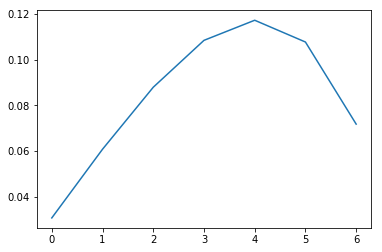

In [38]:

n=7
h=1/(n+1)

K_100  = linalg.toeplitz([2, -1]+[0]*(n-2))
x = np.transpose(np.array([range(n)])+1)*h
print(x)
f_100=x*x*3
ans = (x*x*x*x)/4-1/4*x
# print(T_1)
# print(f_100)
u=linalg.solve(1/h/h*K_100,f_100)
# print(ans-u[round(n/2)])


# print(ans)
# print(u)

print(round(n/2)+1)

print(ans[round(n/2)]-u[round(n/2)])

# print(u)
pyplot.plot(u)
pyplot.show()




### 1.2.15
$cos(4{\pi}ih)$が振動していることを捉えられるようにするには、nをどれくらいにするのが適切か

#### 解答



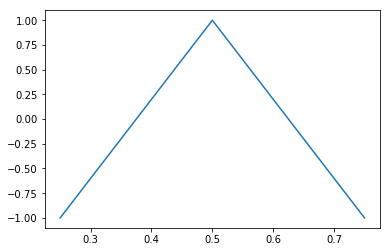

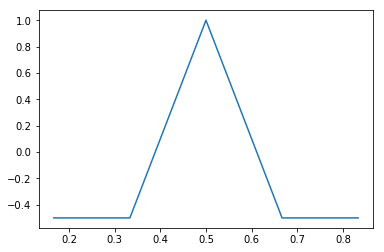

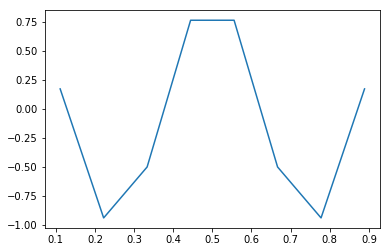

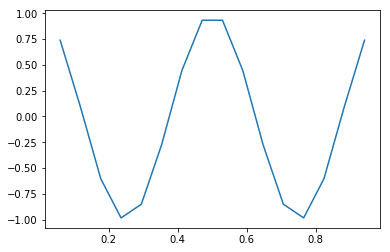

In [68]:
for n in [3,5,8,16]:
    h=(np.array(np.array(range(n)))+1)/(n+1)
    u=np.cos(4*math.pi*h)
    pyplot.plot(h,u)
    pyplot.show()


### 1.2.16
$-u'(i)=cos(4{\pi}ih)$を固定端-固定端の境界条件で解いて重ねてプロットしなさい

#### 解答
境界条件が効いて定数項が出てきた。2階の積分は周波数や位相は変わらない


[ 0.03225806  0.06451613  0.09677419  0.12903226  0.16129032  0.19354839
  0.22580645  0.25806452  0.29032258  0.32258065  0.35483871  0.38709677
  0.41935484  0.4516129   0.48387097  0.51612903  0.5483871   0.58064516
  0.61290323  0.64516129  0.67741935  0.70967742  0.74193548  0.77419355
  0.80645161  0.83870968  0.87096774  0.90322581  0.93548387  0.96774194]


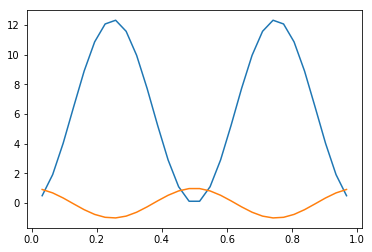

In [73]:
m=1
nn=30
n=nn*m    
h=(np.array(np.array(range(n)))+1)/(nn+1)
K_n  = -linalg.toeplitz(np.hstack((np.array([2,-1]),np.zeros(n-2))))
# print(K_n)
f=np.cos(4*math.pi*h)
print(h)

pyplot.plot(h,linalg.solve(K_n, f))
pyplot.plot(h,f)
pyplot.show()



### 1.2.17
$(e^{ax})$にたいして前進差分と中心2階差分を計算し、$(e^{ax})$の因子を括り出してみよ

#### 解答
指数関数の微分の性質 $(e^{ax})'=ae^{ax}$を確認することができた。
一回微分も2階微分も誤差の主要項は3次である。


In [95]:
alpha = -0.5
n=10
h=1/(n+1)
a=np.ones([1,n])
x = np.transpose(np.array([range(n)])+1)*h
D_n = 1/h*sp.spdiags(np.r_[a, -a], [1,0],n,n).toarray()
K_n  = -1/h/h*linalg.toeplitz(np.hstack((np.array([2,-1]),np.zeros(n-2))))
exp_n = np.exp(alpha*x)
print(exp_n)
print(h*D_n)
print(D_n.dot(exp_n)/exp_n)
print(K_n.dot(exp_n)/exp_n)


[[ 0.95556304]
 [ 0.91310072]
 [ 0.87252529]
 [ 0.83375292]
 [ 0.79670347]
 [ 0.76130039]
 [ 0.72747051]
 [ 0.69514393]
 [ 0.66425384]
 [ 0.63473642]]
[[-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]]
[[ -0.4888066]
 [ -0.4888066]
 [ -0.4888066]
 [ -0.4888066]
 [ -0.4888066]
 [ -0.4888066]
 [ -0.4888066]
 [ -0.4888066]
 [ -0.4888066]
 [-11.       ]]
[[-126.37687261]
 [   0.25004305]
 [   0.25004305]
 [   0.25004305]
 [   0.25004305]
 [   0.25004305]
 [   0.25004305]
 [   0.25004305]
 [   0.25004305]
 [-115.37308434]]


### 1.2.18


#### 解答
ぴったりになる。中心差分は2次精度で係数は元の関数の4回微分なので今回のような3次のものは（打ち切り誤差を除いて）誤差なしで解ける


In [100]:
n=4
h=1/(n+1)
x = np.transpose(np.array([range(n)])+1)*h

K_n  = -1/h/h*linalg.toeplitz(np.hstack((np.array([2,-1]),np.zeros(n-2))))

print(linalg.solve(K_n, x))
print(1/6*(x*x*x-x))



[[-0.032]
 [-0.056]
 [-0.064]
 [-0.048]]
[[-0.032]
 [-0.056]
 [-0.064]
 [-0.048]]


### 1.2.19


#### 解答



In [110]:
n=4
h=1/(n+1)
x = np.transpose(np.array([range(n)])+1)*h
K_n  = -1/h/h*linalg.toeplitz(np.hstack((np.array([2,-1]),np.zeros(n-2))))
a=np.ones([1,n])
b=np.zeros([1,n])
D_n = 1/h*sp.spdiags(np.r_[a, b,-a], [1,0,-1],n,n).toarray()
print(K_n)
print(D_n)
M = K_n+D_n

print(linalg.solve(M,np.transpose(a)))

D_n = 1/h*sp.spdiags(np.r_[a, -a], [1,0],n,n).toarray()
print(D_n)
M = K_n+D_n
print(linalg.solve(M,np.transpose(a)))

print()


[[-50.  25.  -0.  -0.]
 [ 25. -50.  25.  -0.]
 [ -0.  25. -50.  25.]
 [ -0.  -0.  25. -50.]]
[[ 0.  5.  0.  0.]
 [-5.  0.  5.  0.]
 [ 0. -5.  0.  5.]
 [ 0.  0. -5.  0.]]
[[-0.09194313]
 [-0.11990521]
 [-0.10521327]
 [-0.06208531]]
[[-5.  5.  0.  0.]
 [ 0. -5.  5.  0.]
 [ 0.  0. -5.  5.]
 [ 0.  0.  0. -5.]]
[[-0.07864975]
 [-0.11085788]
 [-0.10436465]
 [-0.0656203 ]]


### 1.2.20


#### 解答

$sin(x)$と$x*x*2$でたしかめた

In [117]:
n=4
h=1/(n+1)
x = np.transpose(np.array([range(n)])+1)*h
a=np.ones([1,n])
b=np.zeros([1,n])
D_n = 1/h*sp.spdiags(np.r_[a, b,-a], [1,0,-1],n,n).toarray()
f1 = np.sin(x)
f2 = x*x*2
print(np.transpose(f1).dot(D_n.dot(f2)))
print(-np.transpose((D_n).dot(f1)).dot(f2))


[[ 1.69181157]]
[[ 1.69181157]]


### 1.2.21


#### 解答

$u(x+h) = u(x)+hu'(x)+\frac{1}{2}h^2u''(x)+...$

よりx=0として、$u(h)=u(0)+hu'(0)+\frac{1}{2}h^2u''(x)$

ここで$u(h)=:u_1, u(0)=u_0,$さらに$-u''(x)=f(x)$より、
$u_1=u_0-f(0)\frac{1}{2}h^2$

これを並べ替えて$u_0-u_1=\frac{1}{2}h^2f(0)$

### 1.2.22


#### 解答



In [122]:
n=7
a=3
h=1/(n+1)
x = np.transpose(np.array([range(n)])+1)*h
K_n  = -1/h/h*linalg.toeplitz(np.hstack((np.array([2,-1]),np.zeros(n-2))))
print(K_n)

f = np.hstack((np.array([0]*a),np.array([1]*(n-a))))
print(f)

print()

[[-128.   64.   -0.   -0.   -0.   -0.   -0.]
 [  64. -128.   64.   -0.   -0.   -0.   -0.]
 [  -0.   64. -128.   64.   -0.   -0.   -0.]
 [  -0.   -0.   64. -128.   64.   -0.   -0.]
 [  -0.   -0.   -0.   64. -128.   64.   -0.]
 [  -0.   -0.   -0.   -0.   64. -128.   64.]
 [  -0.   -0.   -0.   -0.   -0.   64. -128.]]
[0 0 0 1 1 1 1]
